In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/allstate-claims-severity/sample_submission.csv
/kaggle/input/allstate-claims-severity/train.csv.zip
/kaggle/input/allstate-claims-severity/sample_submission.csv.zip
/kaggle/input/allstate-claims-severity/train.csv
/kaggle/input/allstate-claims-severity/test.csv
/kaggle/input/allstate-claims-severity/test.csv.zip


In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn import manifold
from sklearn.preprocessing import normalize
import matplotlib.cm as cm

In [3]:
def timer(start_time = None) :
    if not start_time :
        start_time = datetime.now()
    elif start_time :
        tmin, tsec = divmod((datetime.now() - start_time).total_seconds(), 60)
        print(" Time taken: %i minutes and %s seconds." % (tmin, round(tsec,2)))

In [4]:
 def read_train_data() :
    train = pd.read_csv('/kaggle/input/allstate-claims-severity/train.csv', dtype = {'id' : np.int32, 'loss' : np.float32})
    # from feature eimination
    train = train[['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
                  'cat11', 'cat12', 'cat13', 'cat14', 'cat16', 'cat17', 'cat23', 'cat24', 'cat25',
                  'cat26', 'cat27', 'cat28', 'cat29', 'cat31', 'cat32', 'cat36', 'cat37', 'cat38',
                  'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47',
                  'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat57', 'cat58', 'cat59',
                  'cat61', 'cat65', 'cat66', 'cat67', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75',
                  'cat76', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85',
                  'cat86', 'cat87', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95',
                  'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104',
                  'cat105', 'cat106', 'cat107', 'cat108', 'cat109', 'cat110', 'cat111', 'cat112', 'cat113',
                  'cat114', 'cat115', 'cat116', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
                  'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'id', 'loss']]
    
    # create 12 different numerical categories based on loss.
    train['loss_category'] = pd.Series(np.zeros(len(train)), index = train.index)
    for i in range(12) :
        if (i == 0) :
            myindex = (train.loss < ((i*1000) + 1000))
        if (i > 0) & (i < 11) :
            myindex = ((train.loss  > (i*1000) - 1) & (train.loss < (i*1000) + 1000))
        if (i == 11) :
            myindex = (train.loss > ((i*1000) - 1))
        train.loc[myindex, 'loss_category'] = i
    y = np.array(train['loss_category'])
    
    cat_features = train.dtypes[train.dtypes == 'object'].index
    for c in range(len(cat_features)) :
        train[cat_features[c]] = train[cat_features[c]].astype('category').cat.codes
    X = np.array(train.drop(['id', 'loss', 'loss_category'], axis = 1))
    del train
    return X, y
    

In [5]:
def run_tsne(train, target) :
    sss = ShuffleSplit(len(target), test_size = 0.07)
    for train_idx, test_idx in sss.split(train, target) :
        break
        
    X_train, X_valid = train[train_idx], train[test_idx]
    y_train, y_valid = target[train_idx], target[test_idx]
    
    train_norm = normalize(X_valid, axis = 0)
    tsne = manifold.TSNE(n_components = 3, init = 'pca', random_state = 2020, method = 'barnes_hut', n_iter = 500, verbose = 2)
    train_tsne = tsne.fit_transform(train_norm)
    return (train_tsne, y_valid)   

In [6]:
def tsne_vis(tsne_data, tsne_group) :
    colors = cm.rainbow(np.linspace(0, 1, 12))
    labels = ['<1K', '1-2K', '2-3K', '3-4K', '4-5K', '5-6K', '6-7K','7-8K', '8-9K', '9-10K', '10-11K', '>11K']
    plt.figure(figsize = (10, 10))
    for l, c, co in zip(labels, colors, range(12)) :
        plt.scatter(tsne_data[np.where(tsne_groups == co), 0],tsne_data[np.where(tsne_groups == co), 1], marker='o', color=c,
                    linewidth='1', alpha=0.8, label=l)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('t-sne for 7% training samples')
    plt.legend(loc = 'best')
    plt.savefig('ranbow-01.png')
    plt.show(block = False)
    
    plt.figure(figsize = (10, 10))
    for l, c, co in zip(labels, colors, range(12)) :
        plt.scatter(tsne_data[np.where(tsne_groups == co), 0],tsne_data[np.where(tsne_groups == co), 2], marker='o', color=c,
                    linewidth='1', alpha=0.8, label=l)
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 2')
    plt.title('t-sne for 7% training samples')
    plt.legend(loc = 'best')
    plt.savefig('ranbow-02.png')
    plt.show(block = False)
    
    plt.figure(figsize = (10, 10))
    for l, c, co in zip(labels, colors, range(12)) :
        plt.scatter(tsne_data[np.where(tsne_groups == co), 1], tsne_data[np.where(tsne_groups == co), 2], marker = 'o', color = c,
                    linewidth = '1', alpha = 0.8, label = l)
    plt.xlabel('Dimension 0')
    plt.ylabel('Dimension 2')
    plt.title('t-sne for 7% training samples')
    plt.legend(loc = 'best')
    plt.savefig('ranbow-03.png')
    plt.show(block = False)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13183 samples in 0.383s...
[t-SNE] Computed neighbors for 13183 samples in 37.242s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13183
[t-SNE] Computed conditional probabilities for sample 2000 / 13183
[t-SNE] Computed conditional probabilities for sample 3000 / 13183
[t-SNE] Computed conditional probabilities for sample 4000 / 13183
[t-SNE] Computed conditional probabilities for sample 5000 / 13183
[t-SNE] Computed conditional probabilities for sample 6000 / 13183
[t-SNE] Computed conditional probabilities for sample 7000 / 13183
[t-SNE] Computed conditional probabilities for sample 8000 / 13183
[t-SNE] Computed conditional probabilities for sample 9000 / 13183
[t-SNE] Computed conditional probabilities for sample 10000 / 13183
[t-SNE] Computed conditional probabilities for sample 11000 / 13183
[t-SNE] Computed conditional probabilities for sample 12000 / 13183
[t-SNE] Computed conditional probabilities for sa

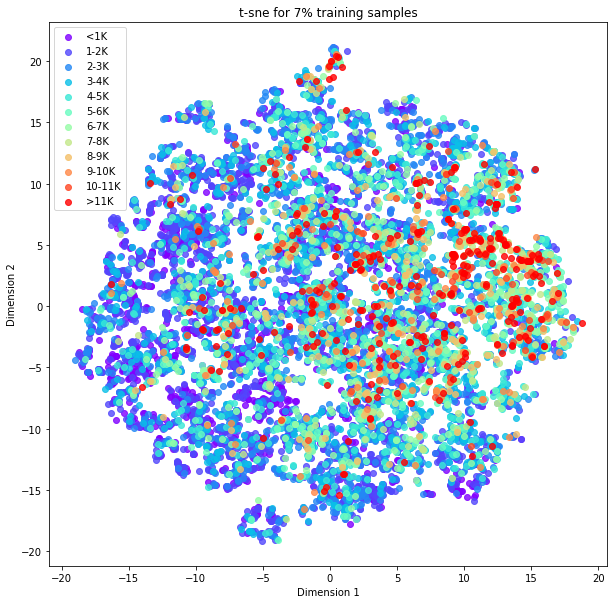

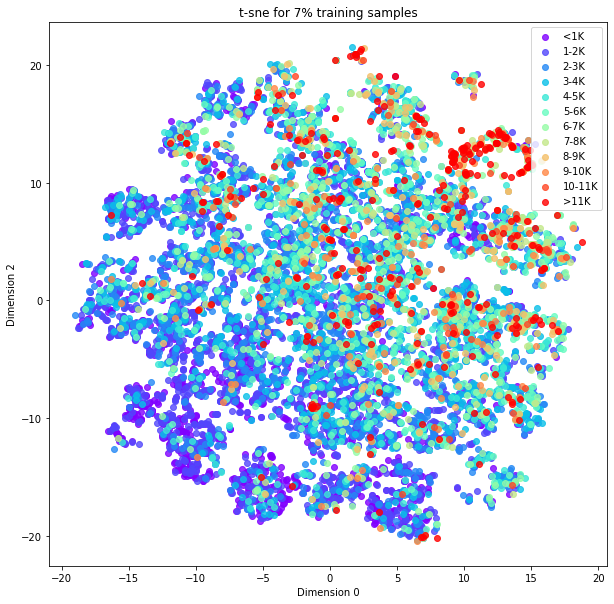

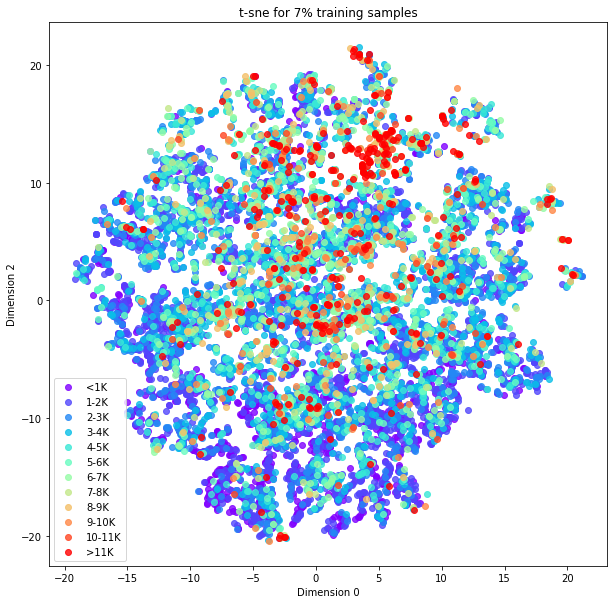

In [7]:
X, y = read_train_data()
start_time = timer(None)
tsne_data, tsne_groups = run_tsne(X, y)
timer(start_time)
tsne_vis(tsne_data, tsne_groups)